In [36]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv("C:\\Users\\Senthil\\Downloads\\MedicinesUsage.csv")

C:\Users\Senthil\AppData\Local\Temp\ipykernel_12624\2438116445.py:1: DtypeWarning: Columns (42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\Senthil\\Downloads\\MedicinesUsage.csv")


In [39]:
# Data Cleaning: Dropping columns with more than 80% missing values
missing_threshold = 0.8
df_cleaned = df.loc[:, df.isnull().mean() < missing_threshold]

In [40]:
# 1. Substitutes Analysis
df_cleaned['num_substitutes'] = df_cleaned[['substitute0', 'substitute1', 'substitute2', 'substitute3', 'substitute4']].notnull().sum(axis=1)
top_substitutes = df_cleaned[['name', 'num_substitutes']].sort_values(by='num_substitutes', ascending=False).head(10)

C:\Users\Senthil\AppData\Local\Temp\ipykernel_12624\941670296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['num_substitutes'] = df_cleaned[['substitute0', 'substitute1', 'substitute2', 'substitute3', 'substitute4']].notnull().sum(axis=1)


In [41]:
# 2. Side Effects Analysis
side_effect_columns = [f'sideEffect{i}' for i in range(8)]  # Adjust the range for side effects
side_effects = df_cleaned[side_effect_columns].apply(lambda x: x.value_counts()).sum(axis=1).sort_values(ascending=False)
top_side_effects = side_effects.head(10)

In [42]:
# 3. Uses Analysis
use_columns = [f'use{i}' for i in range(2)]  # Adjust for relevant use columns
uses = df_cleaned[use_columns].apply(lambda x: x.value_counts()).sum(axis=1).sort_values(ascending=False)
top_uses = uses.head(10)

In [43]:
# 4. Therapeutic Class Analysis
therapeutic_class_effects = df_cleaned.groupby('Therapeutic Class')[side_effect_columns].apply(lambda x: x.notnull().sum()).sum(axis=1)
top_therapeutic_classes = therapeutic_class_effects.sort_values(ascending=False).head(10)

In [44]:
# 5. Habit-Forming Analysis
habit_forming_counts = df_cleaned['Habit Forming'].value_counts()

In [45]:
# Group by Therapeutic Class and Habit-Forming to see the distribution
habit_by_class = df_cleaned.groupby(['Therapeutic Class', 'Habit Forming']).size().unstack().fillna(0)

In [46]:
# 6. Action Class Analysis
# Analyze how side effects and substitutes vary across action classes
action_class_side_effects = df_cleaned.groupby('Action Class')[side_effect_columns].apply(lambda x: x.notnull().sum()).sum(axis=1)
top_action_classes = action_class_side_effects.sort_values(ascending=False).head(10)


In [47]:
# 7. Correlation Analysis
# Create a correlation matrix for numerical features (e.g., num_substitutes)
correlation_matrix = df_cleaned[['num_substitutes']].corr()


In [49]:
# 8. Clustering Drugs Based on Substitutes
from sklearn.cluster import KMeans

In [50]:
# Prepare data for clustering
substitute_data = df_cleaned[['num_substitutes']].fillna(0)

In [51]:
# Apply KMeans clustering to group drugs based on their substitutes
kmeans = KMeans(n_clusters=5, random_state=42).fit(substitute_data)
df_cleaned['Cluster'] = kmeans.labels_

C:\Users\Senthil\AppData\Local\Temp\ipykernel_12624\148268144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = kmeans.labels_


In [55]:
# Display the number of drugs in each cluster
cluster_counts = df_cleaned['Cluster'].value_counts()
print(cluster_counts)

Cluster
0    226856
3      9597
1      4754
2      3634
4      3377
Name: count, dtype: int64


In [60]:
type(df)

pandas.core.frame.DataFrame

In [65]:
df.head(10)

,id,name,substitute0,substitute1,substitute2,substitute3,substitute4,sideEffect0,sideEffect1,sideEffect2,...,sideEffect41,use0,use1,use2,use3,use4,Chemical Class,Habit Forming,Therapeutic Class,Action Class
0,1,augmentin 625 duo tablet,Penciclav 500 mg/125 mg Tablet,Moxikind-CV 625 Tablet,Moxiforce-CV 625 Tablet,Fightox 625 Tablet,Novamox CV 625mg Tablet,Vomiting,Nausea,Diarrhea,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,NaN,No,ANTI INFECTIVES,NaN
1,2,azithral 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,Abdominal pain,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,Macrolides,No,ANTI INFECTIVES,Macrolides
2,3,ascoril ls syrup,Solvin LS Syrup,Ambrodil-LX Syrup,Zerotuss XP Syrup,Capex LS Syrup,Broxum LS Syrup,Nausea,Vomiting,Diarrhea,...,NaN,Treatment of Cough with mucus,NaN,NaN,NaN,NaN,NaN,No,RESPIRATORY,NaN
3,4,allegra 120mg tablet,Lcfex Tablet,Etofex 120mg Tablet,Nexofex 120mg Tablet,Fexise 120mg Tablet,Histafree 120 Tablet,Headache,Drowsiness,Dizziness,...,NaN,Treatment of Sneezing and runny nose due to al...,Treatment of Allergic conditions,NaN,NaN,NaN,Diphenylmethane Derivative,No,RESPIRATORY,H1 Antihistaminics (second Generation)
4,5,avil 25 tablet,Eralet 25mg Tablet,NaN,NaN,NaN,NaN,Sleepiness,Dryness in mouth,NaN,...,NaN,Treatment of Allergic conditions,NaN,NaN,NaN,NaN,Pyridines Derivatives,No,RESPIRATORY,H1 Antihistaminics (First Generation)
5,6,allegra-m tablet,Emlukast-FX Tablet,LCFEX-Mont Tablet,Fixar 10mg/120mg Tablet,Histakind-M Tablet,Histafree-M Tablet,Nausea,Diarrhea,Vomiting,...,NaN,Treatment of Sneezing and runny nose due to al...,NaN,NaN,NaN,NaN,NaN,No,RESPIRATORY,NaN
6,7,amoxyclav 625 tablet,Penciclav 500 mg/125 mg Tablet,Moxikind-CV 625 Tablet,Moxiforce-CV 625 Tablet,Fightox 625 Tablet,Novamox CV 625mg Tablet,Vomiting,Nausea,Diarrhea,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,NaN,No,ANTI INFECTIVES,NaN
7,8,azee 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,Abdominal pain,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,Macrolides,No,ANTI INFECTIVES,Macrolides
8,9,atarax 25mg tablet,HD Zine 25mg Tablet,Hyzox 25 Tablet,Hizet 25mg Tablet,Hydil 25mg Tablet,Zyzine 25mg Tablet,Sedation,Nausea,Vomiting,...,NaN,Treatment of Anxiety,Treatment of Skin conditions with inflammation...,NaN,NaN,NaN,Piperazine Derivative,No,RESPIRATORY,H1 Antihistaminics (First Generation)
9,10,ascoril d plus syrup sugar free,Arnikof D Syrup,Cofsolve-D Syrup,Tucin D Syrup,Akof-D Syrup Sugar Free,Krisbro D Syrup,Nausea,Vomiting,Loss of appetite,...,NaN,Treatment of Dry cough,NaN,NaN,NaN,NaN,NaN,No,RESPIRATORY,NaN


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248218 entries, 0 to 248217
Data columns (total 58 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 248218 non-null  int64 
 1   name               248218 non-null  object
 2   substitute0        238621 non-null  object
 3   substitute1        233867 non-null  object
 4   substitute2        230233 non-null  object
 5   substitute3        226856 non-null  object
 6   substitute4        223962 non-null  object
 7   sideEffect0        248218 non-null  object
 8   sideEffect1        238416 non-null  object
 9   sideEffect2        229500 non-null  object
 10  sideEffect3        207638 non-null  object
 11  sideEffect4        163560 non-null  object
 12  sideEffect5        131258 non-null  object
 13  sideEffect6        91857 non-null   object
 14  sideEffect7        67750 non-null   object
 15  sideEffect8        48506 non-null   object
 16  sideEffect9        3

In [72]:
df.describe()

,id
count,248218.000000
mean,124109.500000
std,71654.508896
min,1.000000
25%,62055.250000
50%,124109.500000
75%,186163.750000
max,248218.000000


In [74]:
data1 = df.drop_duplicates()
data1

,id,name,substitute0,substitute1,substitute2,substitute3,substitute4,sideEffect0,sideEffect1,sideEffect2,...,sideEffect41,use0,use1,use2,use3,use4,Chemical Class,Habit Forming,Therapeutic Class,Action Class
0,1,augmentin 625 duo tablet,Penciclav 500 mg/125 mg Tablet,Moxikind-CV 625 Tablet,Moxiforce-CV 625 Tablet,Fightox 625 Tablet,Novamox CV 625mg Tablet,Vomiting,Nausea,Diarrhea,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,NaN,No,ANTI INFECTIVES,NaN
1,2,azithral 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,Abdominal pain,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,Macrolides,No,ANTI INFECTIVES,Macrolides
2,3,ascoril ls syrup,Solvin LS Syrup,Ambrodil-LX Syrup,Zerotuss XP Syrup,Capex LS Syrup,Broxum LS Syrup,Nausea,Vomiting,Diarrhea,...,NaN,Treatment of Cough with mucus,NaN,NaN,NaN,NaN,NaN,No,RESPIRATORY,NaN
3,4,allegra 120mg tablet,Lcfex Tablet,Etofex 120mg Tablet,Nexofex 120mg Tablet,Fexise 120mg Tablet,Histafree 120 Tablet,Headache,Drowsiness,Dizziness,...,NaN,Treatment of Sneezing and runny nose due to al...,Treatment of Allergic conditions,NaN,NaN,NaN,Diphenylmethane Derivative,No,RESPIRATORY,H1 Antihistaminics (second Generation)
4,5,avil 25 tablet,Eralet 25mg Tablet,NaN,NaN,NaN,NaN,Sleepiness,Dryness in mouth,NaN,...,NaN,Treatment of Allergic conditions,NaN,NaN,NaN,NaN,Pyridines Derivatives,No,RESPIRATORY,H1 Antihistaminics (First Generation)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248213,248214,zestrain 100mg/325mg/250mg tablet mr,Aclotec MR 100mg/325mg/250mg Tablet,SAMONEC MR TABLET,Uniclof 100mg/325mg/250mg Tablet MR,Macito 100mg/325mg/250mg Tablet MR,Rumatin 100mg/325mg/250mg Tablet MR,Nausea,Vomiting,Heartburn,...,NaN,Treatment of Muscular pain,NaN,NaN,NaN,NaN,NaN,No,PAIN ANALGESICS,NaN
248214,248215,zoxinace 200mg tablet sr,Algic 200mg Tablet SR,Topnac 200mg Tablet SR,Kindac 200mg Tablet SR,Ultranac 200mg Tablet SR,Bignac 200mg Tablet SR,Dizziness,Indigestion,Nausea,...,NaN,Pain relief,NaN,NaN,NaN,NaN,Dichlorobenzenes Derivative,No,PAIN ANALGESICS,NSAID's- Non-Selective COX 1&2 Inhibitors (ace...
248215,248216,zivex 25mg tablet,HD Zine 25mg Tablet,Hydrocas 25mg Tablet,Hyzox 25 Tablet,Hydil 25mg Tablet,Zyzine 25mg Tablet,Sedation,Nausea,Vomiting,...,NaN,Treatment of Anxiety,Treatment of Skin conditions with inflammation...,NaN,NaN,NaN,Piperazine Derivative,No,RESPIRATORY,H1 Antihistaminics (First Generation)
248216,248217,zi fast 500mg injection,Zycin 500mg Injection,Aziwok 500mg Injection,Azirow 500mg Injection,Toracin 500mg Injection,Azymed 500mg Injection,"Injection site reactions (pain, swelling, redn...",Vomiting,Nausea,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,Macrolides,No,ANTI INFECTIVES,Macrolides


In [75]:
data1.isnull()

,id,name,substitute0,substitute1,substitute2,substitute3,substitute4,sideEffect0,sideEffect1,sideEffect2,...,sideEffect41,use0,use1,use2,use3,use4,Chemical Class,Habit Forming,Therapeutic Class,Action Class
0,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,True,True,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,True,True,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,True,False,False,False,False
4,False,False,False,True,True,True,True,False,False,True,...,True,False,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248213,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,True,True,False,False,True
248214,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,True,False,False,False,False
248215,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,True,False,False,False,False
248216,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,True,False,False,False,False


In [76]:
data1.isnull().sum()

id                        0
name                      0
substitute0            9597
substitute1           14351
substitute2           17985
substitute3           21362
substitute4           24256
sideEffect0               0
sideEffect1            9802
sideEffect2           18718
sideEffect3           40580
sideEffect4           84658
sideEffect5          116960
sideEffect6          156361
sideEffect7          180468
sideEffect8          199712
sideEffect9          210510
sideEffect10         220944
sideEffect11         227887
sideEffect12         231936
sideEffect13         233491
sideEffect14         237799
sideEffect15         240537
sideEffect16         242209
sideEffect17         242836
sideEffect18         243703
sideEffect19         244272
sideEffect20         244995
sideEffect21         245093
sideEffect22         245170
sideEffect23         245313
sideEffect24         245495
sideEffect25         246715
sideEffect26         246715
sideEffect27         246724
sideEffect28        

In [78]:
data1.isnull().sum().sum()

10002467

In [79]:
data1.fillna('', inplace=True)

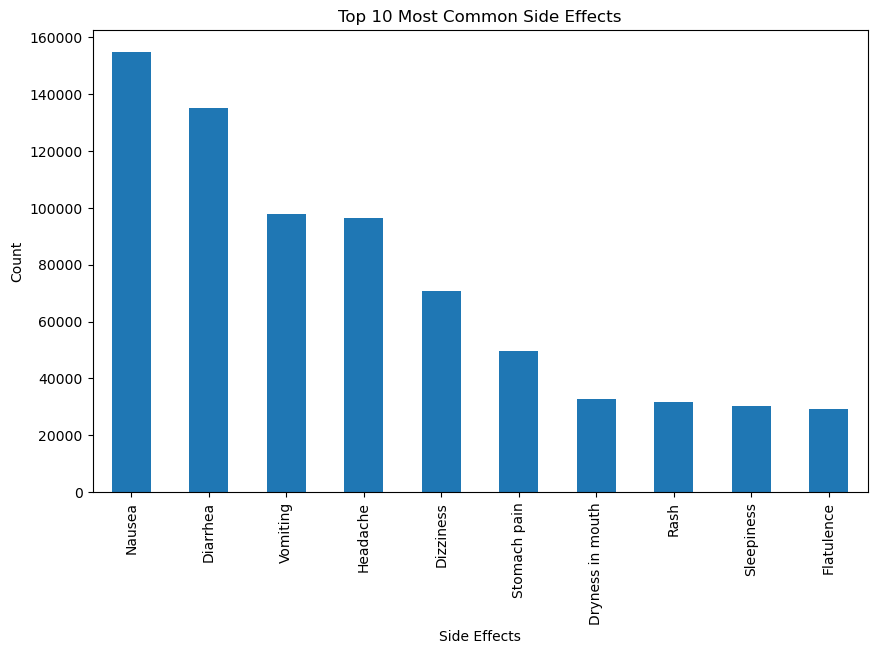

In [20]:
# 9. Visualization

# Plot the top 10 side effects
plt.figure(figsize=(10, 6))
top_side_effects.plot(kind='bar')
plt.title("Top 10 Most Common Side Effects")
plt.xlabel("Side Effects")
plt.ylabel("Count")
plt.show()

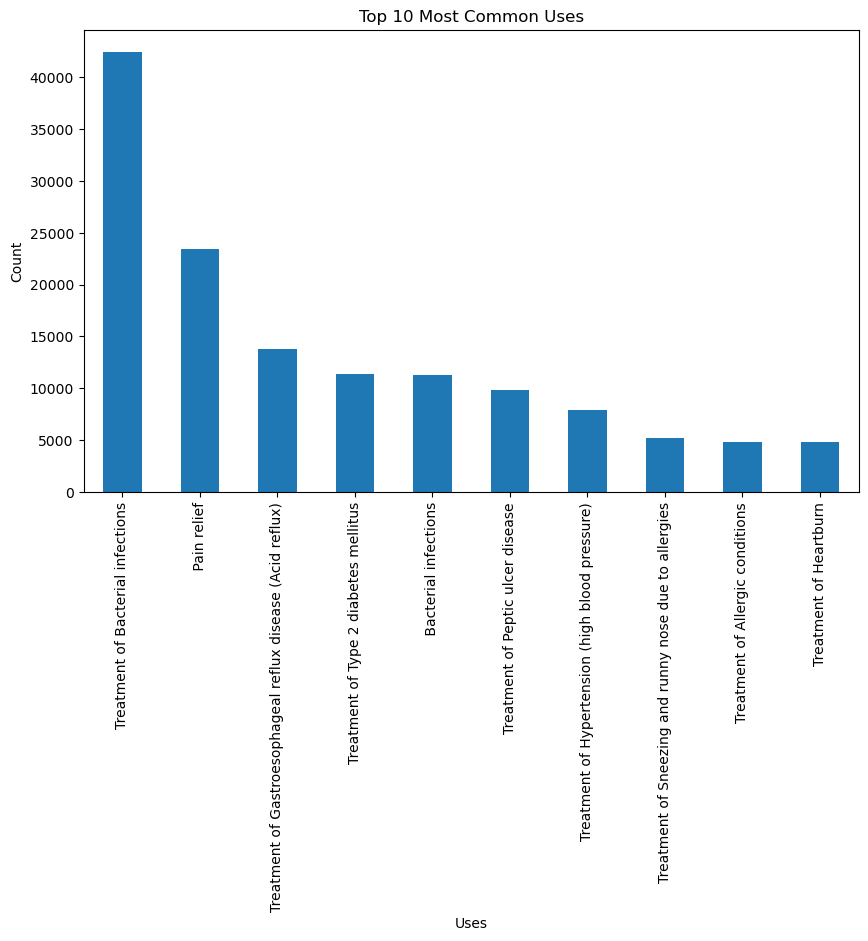

In [39]:
# Plot the top 10 uses
plt.figure(figsize=(10, 6))
top_uses.plot(kind='bar')
plt.title("Top 10 Most Common Uses")
plt.xlabel("Uses")
plt.ylabel("Count")
plt.show()

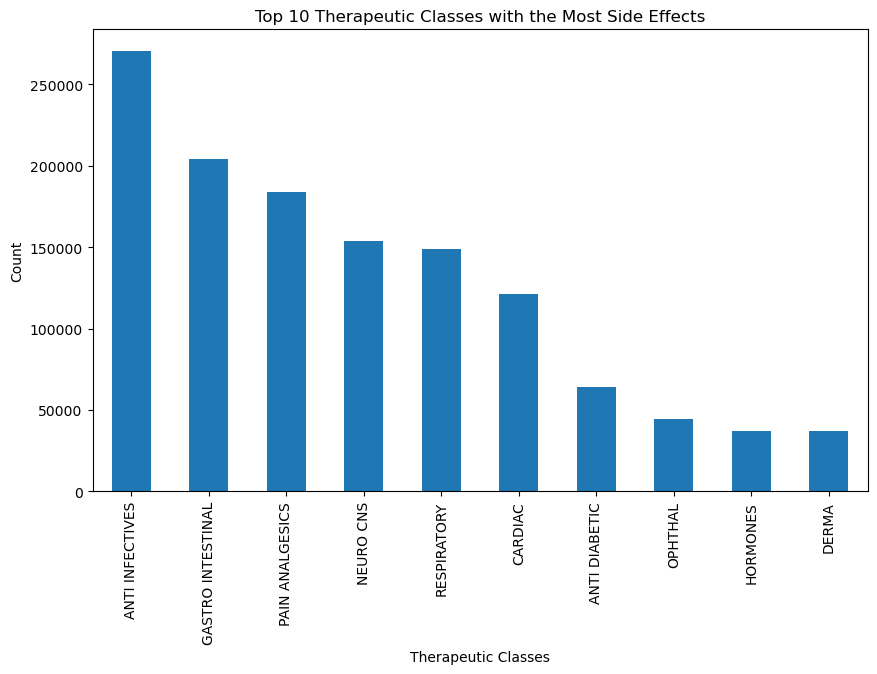

In [41]:
# Plot the top therapeutic classes with most side effects
plt.figure(figsize=(10, 6))
top_therapeutic_classes.plot(kind='bar')
plt.title("Top 10 Therapeutic Classes with the Most Side Effects")
plt.xlabel("Therapeutic Classes")
plt.ylabel("Count")
plt.show()

<Figure size 1000x600 with 0 Axes>

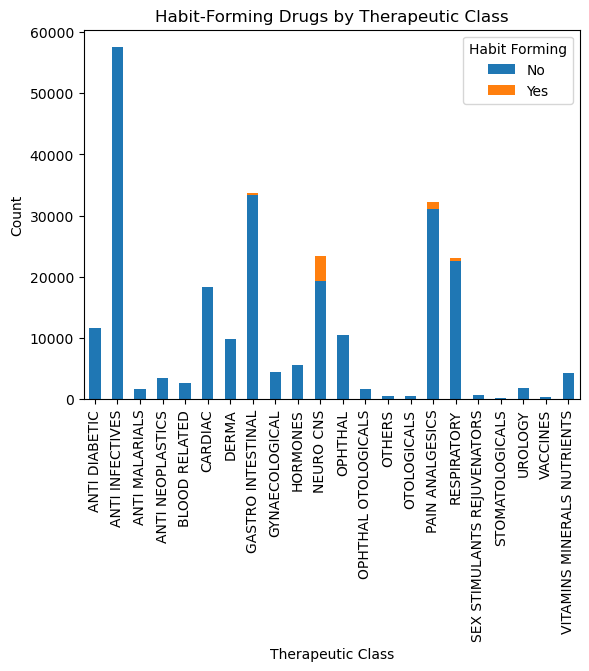

In [43]:
# Plot the distribution of habit-forming drugs by therapeutic class
plt.figure(figsize=(10, 6))
habit_by_class.plot(kind='bar', stacked=True)
plt.title("Habit-Forming Drugs by Therapeutic Class")
plt.xlabel("Therapeutic Class")
plt.ylabel("Count")
plt.show()

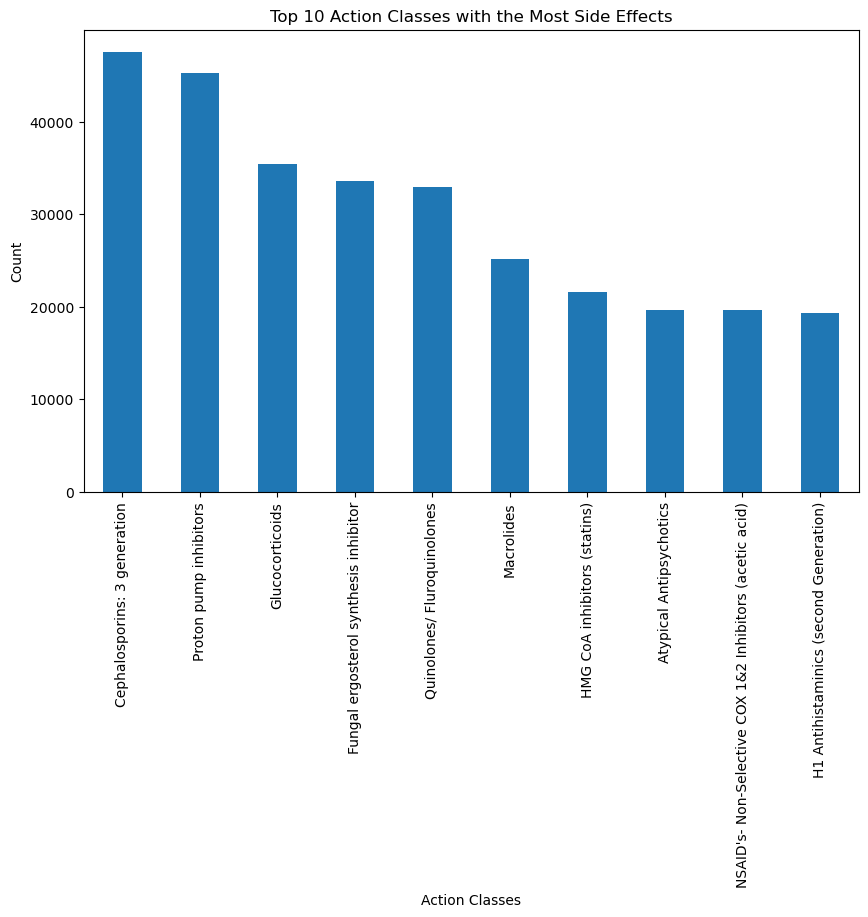

In [45]:
# Plot the top action classes with the most side effects
plt.figure(figsize=(10, 6))
top_action_classes.plot(kind='bar')
plt.title("Top 10 Action Classes with the Most Side Effects")
plt.xlabel("Action Classes")
plt.ylabel("Count")
plt.show()

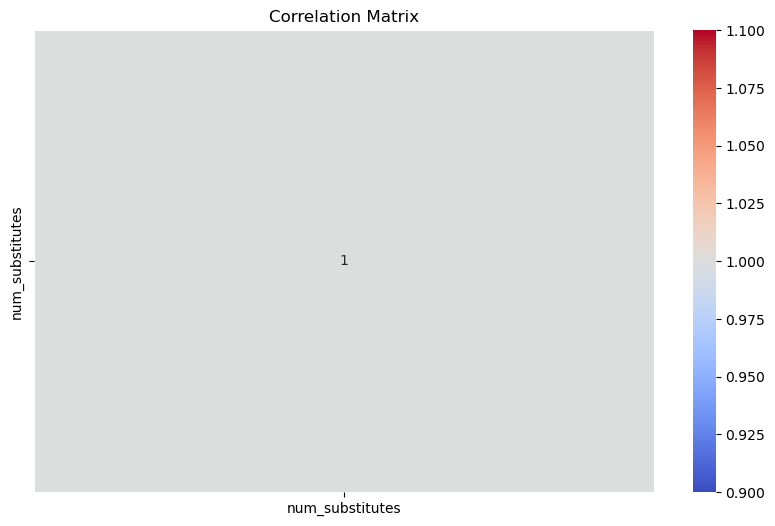

In [51]:
# Plot the correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

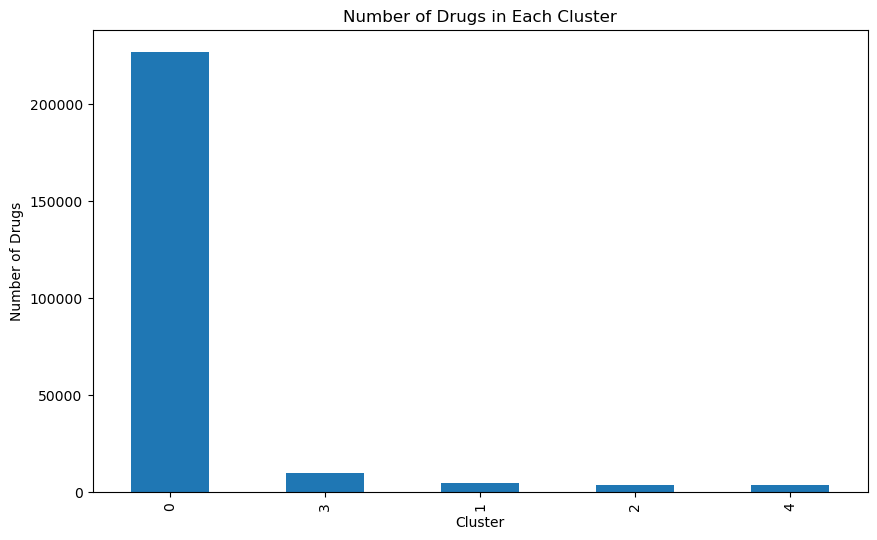

In [53]:
# Plot the number of drugs in each cluster
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar')
plt.title("Number of Drugs in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Drugs")
plt.show()